/Users/HPSahasrabuddhe/opt/miniconda3/envs/carla_mp_api/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/HPSahasrabuddhe/opt/miniconda3/envs/carla_mp_api/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/HPSahasrabuddhe/opt/miniconda3/lib/python3.9/site-packages/mpcontribs/client/__init__.py:88: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


{'mat1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.0001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 100.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 100.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 2.0, 'lower_bound': 1.0}}, 'mat2': {'elec_cond_300k_low_doping': {'upper_bound': 5.0, 'lower_bound': 2.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.009, 'lower_bound': 0.0001}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 200.0}, 'shear_modulus': {'upper_bound': 200.0, 'lower_bound': 100.0}, 'universal_anisotropy': {'upper_bound': 2.3, 'lower_bound': 1.3}}, 'mixture': {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}}
Loading property categories from /Users/HPSahasrabud

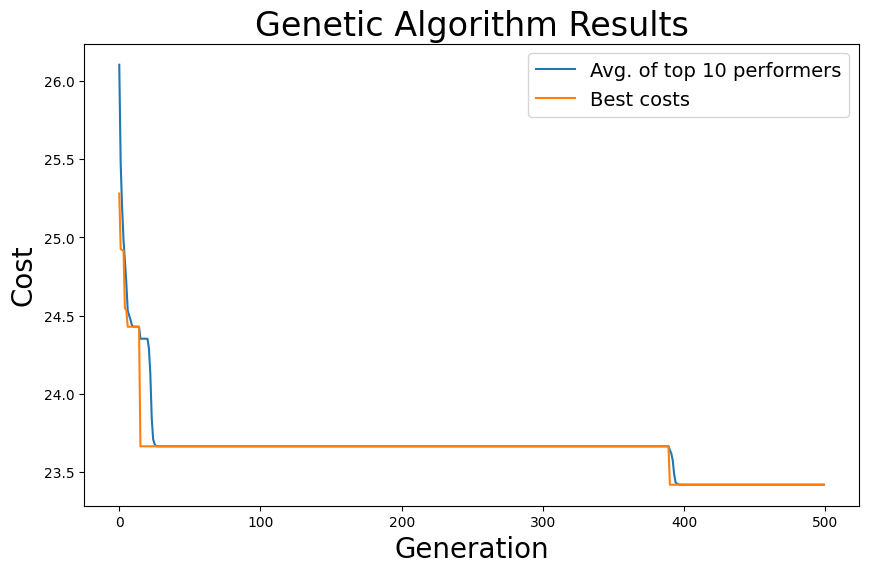

2024-02-11 23:42:14,481 - log.custom_logger - INFO - self.fields: {'material_id': [], 'is_stable': [], 'band_gap': [], 'is_metal': [], 'formula_pretty': [], 'mp-ids-contrib': [], 'elec_cond_300k_low_doping': [], 'therm_cond_300k_low_doping': [], 'bulk_modulus': [], 'shear_modulus': [], 'universal_anisotropy': []}


Retrieving SummaryDoc documents:   0%|          | 0/153235 [00:00<?, ?it/s]

2024-02-11 23:43:50,369 - log.custom_logger - INFO - Process 0: 0 of 100
errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
2024-02-11 23:43:53,780 - log.custom_logger - INFO - Process 0: 1 of 100
2024-02-11 23:43:54,784 - log.custom_logger - INFO - Process 0: 2 of 100
2024-02-11 23:43:57,243 - log.custom_logger - INFO - Process 0: 3 of 100
2024-02-11 23:43:58,287 - log.custom_logger - INFO - Process 0: 4 of 100
2024-02-11 23:43:59,330 - log.custom_logger - INFO - Process 0: 5 of 100
2024-02-11 23:44:00,218 - log.custom_logger - INFO - Process 0: 6 of 100
2024-02-11 23:44:02,613 - log.custom_logger - INFO - Process 0: 7 of 100
2024-02-11 23:44:03,691 - log.custom_logger - INFO - Process 0: 8 of 100
2024-02-11 23:44:04,741 - log.custom_logger - INFO 

best_designs_dict = {'mat1': {'carrier-transport': {'elec_cond_300k_low_doping': [10.922026859051233, 12.962222145628395, 9.962623647820518, 13.195386435191859, 14.916029131222112, 15.432358177541479, 17.87095937303713, 18.38355651750889, 10.744213603144676, 8.360825762646183, 12.382928112817819, 17.484759325939464, 18.28087499500404, 12.433477865913893, 5.852909986002935, 10.841241717460266, 12.593331347917774, 5.249005158443333, 10.671200740679735, 13.54261957928231, 15.119574411686319, 14.017136473390018, 17.420405856650518, 7.563614277566385, 16.125831502717062, 13.621021920578594, 11.0015058046532, 7.882817978204495, 6.9056677261365, 7.9160585732429904, 17.626950203606807, 11.139072414640166, 13.299920313827393, 13.669477739753653, 16.041678795870023, 6.026379054961903, 4.044429052236022, 16.626987339978932, 13.926217310915966, 6.7242806488816145, 3.3746714948224747, 7.300766624465661, 11.375417011989551, 9.610669399206714, 12.563851349191598, 10.629146901629905, 17.72379911844979

In [1]:
from core.optimization import HashinShtrikman
from core.user_input import MaterialProperty, Material, MixtureProperty, Mixture

# Define properties for each material
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.0001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=100, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=100, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2, lower_bound=1),
]

properties_mat_2 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=5, lower_bound=2),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.009, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=200),
    MaterialProperty(prop='shear_modulus', upper_bound=200, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.3, lower_bound=1.3),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat1', properties=properties_mat_1)
mat_2 = Material(name='mat2', properties=properties_mat_2)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mixture]

user_input = {}
for entity in aggregate:
    user_input.update(entity.custom_dict())

print(user_input)

# Testing with subset of possible property_docs
api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM"
mp_contribs_project="carrier_transport"


HS = HashinShtrikman(api_key=api_key, 
                     mp_contribs_project=mp_contribs_project,
                     user_input=user_input,)

HS.set_HS_optim_params()
HS.print_table_of_best_designs()
HS.plot_optimization_results()
# with open("consolidated_dict_02_11_2024_08_46_12 copy") as f:
#     consolidated_dict = json.load(f)
consolidated_dict = HS.generate_consolidated_dict(total_docs=100)
mat_1_ids, mat_2_ids = HS.get_material_matches(consolidated_dict)

print("Material 1 Matches:")
print(mat_1_ids)
print("Material 2 Matches:")
print(mat_2_ids)

HS.get_material_match_costs(mat_1_ids=mat_1_ids, mat_2_ids=mat_2_ids, consolidated_dict=consolidated_dict)

In [ ]:
mat_1_ids = ["mp-546266", "mp-12863", "mp-1509", "mp-16290"]
mat_2_ids = ["mp-546266", "mp-12863"]

HS.get_material_match_costs(mat_1_ids=mat_1_ids, mat_2_ids=mat_2_ids, consolidated_dict=consolidated_dict)